## Setting

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 패키지 업그레이드로 인한 에러 처리를 위해 라이브러리 버전 Downgrade
!pip install 'networkx<2.7'

# 런타임 재시작 !

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
!sudo apt-get install g++ openjdk-7-jdk # Install Java 1.7+
# !sudo apt-get install python-dev; pip install konlpy     # Python 2.x
!sudo apt-get install python3-dev; pip3 install konlpy   # Python 3.x
!sudo apt-get install curl
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
%pip install mecab-python3

In [ ]:
!pip install --upgrade gensim==3.8

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

## Load Data

In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/KDT/project/news_project/data/df1_clustered.csv', index_col=0)

from ast import literal_eval
df1['pos'] = df1['pos'].apply(lambda x: literal_eval(x))
df1['Noun'] = df1['Noun'].apply(lambda x: literal_eval(x))
df1['verb'] = df1['verb'].apply(lambda x: literal_eval(x))
df1['adverb'] = df1['adverb'].apply(lambda x: literal_eval(x))
df1['adjective'] = df1['adjective'].apply(lambda x: literal_eval(x))
df1['token_important'] = df1['token_important'].map(literal_eval)

In [ ]:
cluster_result = {}

## 클러스터링 결과 정리

In [ ]:
cluster_labels = list(df1['cluster_label'].value_counts().index)
cluster_labels.remove(-1)
cluster_labels = sorted(cluster_labels)

In [ ]:
cluster_labels

[0, 1, 2, 3]

In [ ]:
from collections import Counter
from gensim.summarization.summarizer import summarize
stopword = ['은', '는', '이', '가', '등', '고', '와', '해', '된']

for label in cluster_labels:
    cluster_data = df1[df1['cluster_label']==label]
    cluster_tokens = [token for tokens in cluster_data['token_important'].to_list() for token in tokens]
    token_count_dict = Counter(cluster_tokens)
    token_top_20 = dict([token for token in token_count_dict.most_common() if not token[0] in stopword][:20])
    cluster_result[label] = {'keyword' : token_top_20}

    cluster_contents = ' '.join(cluster_data['content'].to_list())
    summarize_result = summarize(cluster_contents, ratio=0.05)
    
    while True:
        summarize_result = summarize(summarize_result, ratio=0.1)
        if len(summarize_result.split('\n')) <= 10:
            break
    
    summarize_result = list(set(summarize_result.split('\n')))
    cluster_result[label].update({'summarization' : summarize_result})

    print('cluster ' +  str(label))
    print(token_top_20)
    print(summarize_result)

cluster 0
{'AI': 4312, 'GPT': 2756, '챗': 2475, '구글': 1488, '검색': 1371, '서비스': 986, '기술': 900, '지능': 863, '인공': 821, 'MS': 770, '오픈': 761, '모델': 683, '챗봇': 678, '기업': 611, '대화': 610, '개발': 589, '정보': 549, '데이터': 538, '공개': 531, '생': 518}
['순다 피차이 구글 및 알파벳 최고경영자 CEO는 6일 현지시간 공식 블로그를 통해 "구글은 바드 Bard라고 하는 람다 LaMDA 기반의 실험적인 대화형 AI 서비스를 개발해 왔다"며 "신뢰할 수 있는 테스터에게 바드를 공개함으로써 한 걸음 더 나아가고 있으며, 일반 이용자에게는 앞으로 몇 주 안에 더 광범위하게 제공할 예정"이라고 밝혔다.', '구글 모회사 알파벳의 순다르 피차이 최고경영자 CEO는 6일(현지 시간) 자사의 블로그를 통해 "구글은 바드라고 하는 람다 LaMDA 기반의 실험적인 대화형 AI 서비스를 개발해 왔고, 오늘 신뢰할 수 있는 테스터에게 바드를 공개하기로 했다"며 "일반 이용자에게는 앞으로 몇 주 내에 광범위하게 제공할 예정"이라고 밝혔다.', '구글 모회사 알파벳의 순다르 피차이 최고경영자 CEO는 6일 현지시간 회사 공식 블로그를 통해 "새로운 대화형 인공지능 AI 서비스 \'바드\' Bard가 신뢰할만한 테스터들에게 개방될 것"이라며 "향후 수 주안에 일반인들을 위한 서비스를 준비하고 있다"고 밝혔다.', '구글 모회사 알파벳의 순다르 피차이 최고경영자 CEO는 이날 회사 공식 블로그에서 "새로운 대화형 인공지능 AI 서비스 \'바드\' Bard가 신뢰할만한 테스터들에게 개방될 것"이라며 "향후 수 주안에 일반인들을 위한 서비스를 준비하고 있다"고 밝혔다.']
cluster 1
{'매출': 3447, '게임': 2515, '대비': 1992, '년': 1791, '사업': 1653, '영업': 1522, '증가'

In [ ]:
cluster_result

{0: {'keyword': {'AI': 4312,
   'GPT': 2756,
   '챗': 2475,
   '구글': 1488,
   '검색': 1371,
   '서비스': 986,
   '기술': 900,
   '지능': 863,
   '인공': 821,
   'MS': 770,
   '오픈': 761,
   '모델': 683,
   '챗봇': 678,
   '기업': 611,
   '대화': 610,
   '개발': 589,
   '정보': 549,
   '데이터': 538,
   '공개': 531,
   '생': 518},
  'summarization': ['순다 피차이 구글 및 알파벳 최고경영자 CEO는 6일 현지시간 공식 블로그를 통해 "구글은 바드 Bard라고 하는 람다 LaMDA 기반의 실험적인 대화형 AI 서비스를 개발해 왔다"며 "신뢰할 수 있는 테스터에게 바드를 공개함으로써 한 걸음 더 나아가고 있으며, 일반 이용자에게는 앞으로 몇 주 안에 더 광범위하게 제공할 예정"이라고 밝혔다.',
   '구글 모회사 알파벳의 순다르 피차이 최고경영자 CEO는 6일(현지 시간) 자사의 블로그를 통해 "구글은 바드라고 하는 람다 LaMDA 기반의 실험적인 대화형 AI 서비스를 개발해 왔고, 오늘 신뢰할 수 있는 테스터에게 바드를 공개하기로 했다"며 "일반 이용자에게는 앞으로 몇 주 내에 광범위하게 제공할 예정"이라고 밝혔다.',
   '구글 모회사 알파벳의 순다르 피차이 최고경영자 CEO는 6일 현지시간 회사 공식 블로그를 통해 "새로운 대화형 인공지능 AI 서비스 \'바드\' Bard가 신뢰할만한 테스터들에게 개방될 것"이라며 "향후 수 주안에 일반인들을 위한 서비스를 준비하고 있다"고 밝혔다.',
   '구글 모회사 알파벳의 순다르 피차이 최고경영자 CEO는 이날 회사 공식 블로그에서 "새로운 대화형 인공지능 AI 서비스 \'바드\' Bard가 신뢰할만한 테스터들에게 개방될 것"이라며 "향후 수 주안에 일반인들을 위한 서비스를 준비하고 있다"고 밝

## 워드클라우드

In [ ]:
def make_wordcloud(result_dict):
    for result in result_dict:
        wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                              background_color='white',
                              max_font_size=70,
                              colormap='Blues').generate_from_frequencies(result_dict[result]['keyword'])
        plt.figure(figsize=(6, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
        plt.savefig(f'cluster{result}.png')

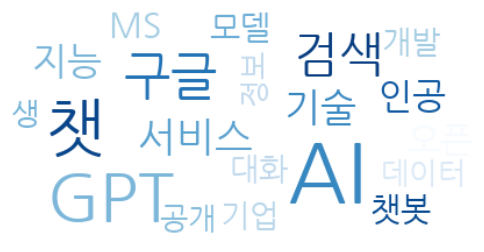

<Figure size 640x480 with 0 Axes>

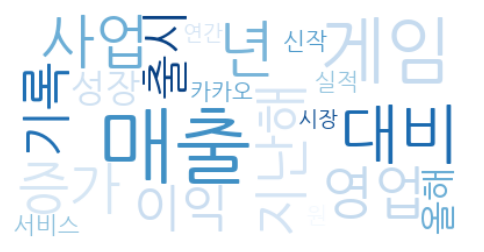

<Figure size 640x480 with 0 Axes>

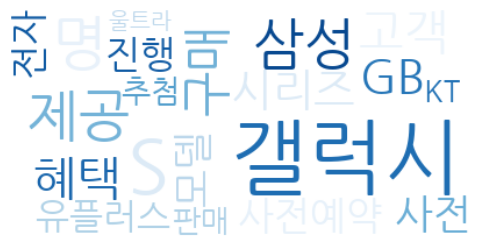

<Figure size 640x480 with 0 Axes>

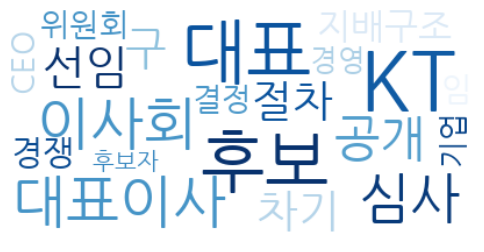

<Figure size 640x480 with 0 Axes>

In [ ]:
make_wordcloud(cluster_result)

## 뉴스레터 텍스트 포맷

In [ ]:
self.text = ''

def write_text(self):
    
    title = f'''

    💌 {self.year}년 {self.month}월 {self.week}주차 뉴스 요약 💌

    '''

    self.text += intro

    for label in self.cluster_result:

        keyword = ' '.join(self.cluster_result[label]['keyword'])
        summarization = '\n    '.join(self.cluster_result[label]['summarization'])

        content = f'''

        ✅ 주요 키워드 {label + 1} : {keyword}

        ➡️ 내용 요약
        
        {summarization}

        '''
        self.text += content
    
    return self.text

In [ ]:
text = ''

In [ ]:
text = ''

year = '2023'
month = '2'
week = '1'

intro = f'''

💌 {year}년 {month}월 {week}주차 뉴스 요약 💌

'''

text += title

In [ ]:
for label in cluster_result:

    keyword = ' '.join(cluster_result[label]['keyword'])
    summarization = '\n    '.join(cluster_result[label]['summarization'])

    content = f'''

    ✅ 주요 키워드 {label + 1} : {keyword}

    ➡️ 내용 요약
    
    {summarization}

    '''
    text += content

In [ ]:
print(text)



💌 2023년 2월 1주차 뉴스 요약 💌



    ✅ 주요 키워드 1 : AI GPT 챗 구글 검색 서비스 기술 지능 인공 MS 오픈 모델 챗봇 기업 대화 개발 정보 데이터 공개 생

    ➡️ 내용 요약
    
    순다 피차이 구글 및 알파벳 최고경영자 CEO는 6일 현지시간 공식 블로그를 통해 "구글은 바드 Bard라고 하는 람다 LaMDA 기반의 실험적인 대화형 AI 서비스를 개발해 왔다"며 "신뢰할 수 있는 테스터에게 바드를 공개함으로써 한 걸음 더 나아가고 있으며, 일반 이용자에게는 앞으로 몇 주 안에 더 광범위하게 제공할 예정"이라고 밝혔다.
    구글 모회사 알파벳의 순다르 피차이 최고경영자 CEO는 6일(현지 시간) 자사의 블로그를 통해 "구글은 바드라고 하는 람다 LaMDA 기반의 실험적인 대화형 AI 서비스를 개발해 왔고, 오늘 신뢰할 수 있는 테스터에게 바드를 공개하기로 했다"며 "일반 이용자에게는 앞으로 몇 주 내에 광범위하게 제공할 예정"이라고 밝혔다.
    구글 모회사 알파벳의 순다르 피차이 최고경영자 CEO는 6일 현지시간 회사 공식 블로그를 통해 "새로운 대화형 인공지능 AI 서비스 '바드' Bard가 신뢰할만한 테스터들에게 개방될 것"이라며 "향후 수 주안에 일반인들을 위한 서비스를 준비하고 있다"고 밝혔다.
    구글 모회사 알파벳의 순다르 피차이 최고경영자 CEO는 이날 회사 공식 블로그에서 "새로운 대화형 인공지능 AI 서비스 '바드' Bard가 신뢰할만한 테스터들에게 개방될 것"이라며 "향후 수 주안에 일반인들을 위한 서비스를 준비하고 있다"고 밝혔다.

    

    ✅ 주요 키워드 2 : 매출 게임 대비 년 사업 영업 증가 지난해 이익 기록 출시 성장 올해 서비스 신작 실적 원 카카오 시장 연간

    ➡️ 내용 요약
    
    윤민혁 기자 KT CI KT는 지난해 연결기준 매출 25조6500억원, 영업이익 1조6901억원을 기록했다고 9일 밝혔다.
    권영식 넷마블 대표는 "지난해 신